In [1]:
# Imports 
import numpy as np
import random
import matplotlib.pyplot as plt

from datetime import datetime

In [3]:
# Parameters
n_cities = 18

n_population = 50

mutation_rate = 0.15

In [14]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])

cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}
cities_dict

{'London': [44, 52],
 'Moscow': [19, 49],
 'Barcelona': [77, 87],
 'Rome': [1, 57],
 'Paris': [50, 6],
 'Vienna': [55, 54],
 'Munich': [12, 20],
 'Istanbul': [59, 33],
 'Kyiv': [39, 87],
 'Bucharest': [88, 54],
 'Minsk': [29, 88],
 'Warsaw': [59, 16],
 'Budapest': [35, 44],
 'Milan': [26, 72],
 'Prague': [1, 92],
 'Sofia': [12, 27],
 'Birmingham': [41, 71],
 'Brussels': [23, 1]}

# 1. Create the first population set

In [15]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)

# add 'Berlin' at the first and last
cities_dict['Berlin'] = [0,0]
a = np.array(['Berlin']*50)
a = np.reshape(a,(50,1))

population_set = np.hstack((a, population_set, a))
population_set

array([['Berlin', 'Milan', 'Moscow', 'Prague', 'Paris', 'Bucharest',
        'Munich', 'Barcelona', 'Brussels', 'Warsaw', 'Budapest', 'Minsk',
        'Rome', 'Kyiv', 'Birmingham', 'London', 'Sofia', 'Istanbul',
        'Vienna', 'Berlin'],
       ['Berlin', 'Barcelona', 'London', 'Paris', 'Budapest', 'Prague',
        'Minsk', 'Vienna', 'Kyiv', 'Istanbul', 'Rome', 'Brussels',
        'Milan', 'Bucharest', 'Sofia', 'Birmingham', 'Munich', 'Warsaw',
        'Moscow', 'Berlin'],
       ['Berlin', 'Istanbul', 'Birmingham', 'Barcelona', 'Munich',
        'Vienna', 'London', 'Bucharest', 'Prague', 'Milan', 'Warsaw',
        'Brussels', 'Minsk', 'Sofia', 'Paris', 'Moscow', 'Budapest',
        'Rome', 'Kyiv', 'Berlin'],
       ['Berlin', 'Prague', 'Budapest', 'London', 'Istanbul', 'Milan',
        'Paris', 'Bucharest', 'Warsaw', 'Sofia', 'Barcelona', 'Vienna',
        'Munich', 'Moscow', 'Rome', 'Birmingham', 'Kyiv', 'Minsk',
        'Brussels', 'Berlin'],
       ['Berlin', 'Moscow', 'Milan',

# 2. Fitness Evaluation

In [16]:
# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    
    return np.sqrt(((a[0]-b[0])**2+(a[1]-b[1])**2))

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

In [17]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [18]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([ 919.38654936,  973.44341632,  883.51053601,  766.70743702,
        893.88308985,  889.05618354,  923.11958873,  950.09708441,
        879.51106646,  868.25663713,  896.79507978,  997.97172811,
       1070.21552826,  818.31183864,  846.8967839 ,  979.2283782 ,
        970.20162812, 1010.96494224,  806.19690863,  909.98789021,
        763.82810469,  995.13138019,  883.51964806,  934.37804551,
        954.34531976,  884.92335283,  960.88570536,  848.53421574,
        708.46524281,  867.74353637,  773.4795941 ,  829.07911537,
        931.43753701,  856.95892301,  801.71852085,  835.42874401,
        891.13943893,  956.82622859,  768.68812177,  793.40237366,
        773.16203924,  793.08490692,  789.93648631,  830.6074817 ,
        804.52674402,  799.63202198,  898.59011716,  869.7939881 ,
        915.14473996,  773.28328987])

# 3. Selection

In [37]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
progenitor_list[0][2]

array(['Rome', 'Minsk', 'Sofia', 'Brussels', 'Budapest', 'Barcelona',
       'Prague', 'Paris', 'Kyiv', 'Bucharest', 'London', 'Istanbul',
       'Warsaw', 'Moscow', 'Birmingham', 'Vienna', 'Milan', 'Munich'],
      dtype='<U10')

# 4. crossover

In [34]:
def mate_progenitors(prog_a, prog_b):
    index = np.random.randint(0,n_cities)
    offspring = prog_a[0:index]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        # print('prog_a: ', prog_a)
        # print('prog_b: ',  prog_b)
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Sofia', 'Minsk', 'Paris', 'Prague', 'Warsaw', 'Birmingham',
       'Budapest', 'Barcelona', 'Istanbul', 'Vienna', 'Bucharest',
       'London', 'Rome', 'Brussels', 'Milan', 'Moscow', 'Munich', 'Kyiv'],
      dtype='<U10')

# 5.  Mutation

In [35]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Sofia', 'Minsk', 'Paris', 'Warsaw', 'Vienna', 'Birmingham',
       'Budapest', 'Barcelona', 'Istanbul', 'Prague', 'Bucharest',
       'London', 'Rome', 'Brussels', 'Milan', 'Moscow', 'Munich', 'Kyiv'],
      dtype='<U10')

# 6. Next generation
#### it will take 10000 iterations.

In [36]:
best_solution = [-1,np.inf,np.array([])]
for i in range(10000):
    if (i%100==0): 
        print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        
    cities_dict['Berlin'] = [0,0]
    a = np.array(['Berlin']*50)
    a = np.reshape(a,(50,1))
    mutated_pop = np.hstack((a, mutated_pop, a))
        
        
    fitnes_list = get_all_fitnes(mutated_pop,cities_dict)
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set[:,1:-1],fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

0 660.9985022244845 873.343560605336 24/11/22 16:23
100 694.628689828194 878.9135077526215 24/11/22 16:23
200 755.9231913387214 866.845382943624 24/11/22 16:23
300 721.5285683872254 856.3342304856892 24/11/22 16:23
400 677.0909839503734 848.8631710903584 24/11/22 16:23
500 642.4656106571758 854.8578903911155 24/11/22 16:23
600 685.6486797839228 868.7439138165021 24/11/22 16:23
700 708.2364562668816 869.8439702833593 24/11/22 16:23
800 698.1667790948037 876.6390577166327 24/11/22 16:23
900 702.2477456264276 858.7080661269955 24/11/22 16:23
1000 693.3715932164238 864.380883168529 24/11/22 16:23
1100 734.371849575096 879.0055493142114 24/11/22 16:23
1200 642.768787705074 869.7265270448437 24/11/22 16:23
1300 630.5473493172232 865.2247625779664 24/11/22 16:23
1400 735.160815791178 875.240761125181 24/11/22 16:23
1500 762.0780353378701 887.6604773592211 24/11/22 16:24
1600 644.9370780371762 868.5132965926806 24/11/22 16:24
1700 759.5110780046869 866.1481868752846 24/11/22 16:24
1800 720.322

In [38]:
best_solution

[9815,
 534.7036430937163,
 array([['Berlin', 'Munich', 'Sofia', 'Budapest', 'Birmingham',
         'Bucharest', 'Barcelona', 'London', 'Vienna', 'Warsaw', 'Paris',
         'Brussels', 'Kyiv', 'Minsk', 'Prague', 'Milan', 'Moscow',
         'Istanbul', 'Rome', 'Berlin']], dtype='<U10')]

In [39]:
best = []
for i in range(20):
    best.append(cities_dict[best_solution[2][0][i]])
    

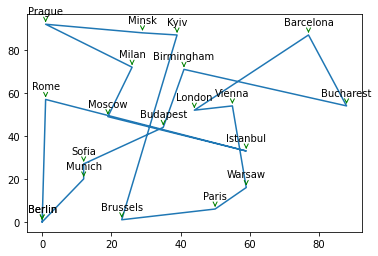

In [40]:
plt.plot(np.array(best)[:,0], np.array(best)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(best)[:,0], np.array(best)[:,1], best_solution[2][0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()

In [20]:
population_set[0]

array(['Berlin', 'Vienna', 'Budapest', 'Bucharest', 'Istanbul', 'Warsaw',
       'Birmingham', 'Barcelona', 'Moscow', 'Paris', 'London', 'Milan',
       'Kyiv', 'Brussels', 'Munich', 'Minsk', 'Rome', 'Prague', 'Sofia',
       'Berlin'], dtype='<U10')

In [21]:
init = []
for i in range(20):
    init.append(cities_dict[population_set[0][i]])
  

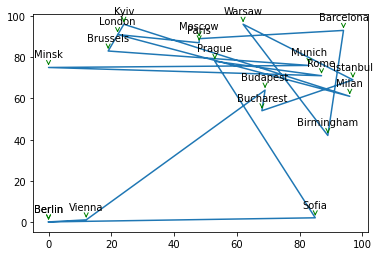

In [22]:
plt.plot(np.array(init)[:,0], np.array(init)[:,1])

#joins the x and y values
for x,y,z in zip(np.array(init)[:,0], np.array(init)[:,1], population_set[0]):

    label = "{}".format(z)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

plt.show()